In [1]:
from data_utils import *
import torch.utils.data as data
import matplotlib.pyplot as plt

# KITTI Dataset

In [2]:
transform_dataset(block_in=4,block_out=1,overlap=0,path_old='/home/ewok261/Documents/psychic-gan/data/2011_09_28')

FileExistsError: [Errno 17] File exists: '/home/ewok261/Documents/psychic-gan/data/in_4_out_1_ol_0'

In [3]:
vd = KITTIData(2,1,0,'/home/ewok261/Documents/psychic-gan/data/in_4_out_1_ol_0')

print('Length of dataset: ', len(vd))

Length of dataset:  787


In [4]:
x,y = vd[134]
print(x.shape,y.shape)

torch.Size([3, 2, 64, 64]) torch.Size([3, 1, 64, 64])


In [6]:
[train_data,val_data] = data.random_split(vd,[1100,243])
print('Length of train dataset: ', len(train_data))
print('Length of validation dataset: ', len(val_data))

Length of train dataset:  1100
Length of validation dataset:  243


In [9]:
train_loader = data.DataLoader(train_data, batch_size = 128, shuffle = True, num_workers = 1)
val_loader = data.DataLoader(val_data, batch_size = 1, shuffle = False, num_workers = 1)

In [2]:
torch.cuda.is_available()

True

# UCF-101 Dataset

In [7]:
vd = UCF101Data(4,1,4,5,'/home/ewok261/Documents/psychic-gan/data/UCF-101')

print('Length of dataset: ', len(vd))

Length of dataset:  184882


In [8]:
x,y = vd[165896]
print(x.shape,y.shape)

52 [208, 213, 218, 223, 228]
torch.Size([3, 4, 240, 320]) torch.Size([3, 1, 240, 320])


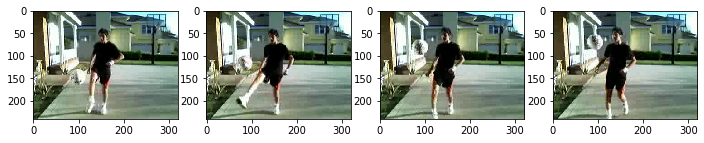

In [9]:
x = x.cpu().squeeze().permute(1,2,3,0).numpy()
y = y.cpu().squeeze().permute(1,2,0).numpy()

plt.figure(figsize=(15, 6))
# img
for idx in range(4):
    plt.subplot(2, 5, idx+1)
    plt.imshow(x[idx])